In [2]:
import pandas as pd
import numpy as np

Data Preprocessing

In [3]:
df = pd.read_csv("loan_approval_dataset_large.csv")

In [4]:
df.head()

,applicant_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,b82f9ece-f0ee-487f-a1c3-98136bb68e0a,Female,Yes,1,Graduate,Yes,11861,43,409,360,1,Semiurban,No
1,f32487ac-5abb-4206-80ad-d6bc85d7794c,Male,Yes,3,Not Graduate,Yes,5534,2019,454,360,0,Rural,No
2,258c1a0c-92ae-4589-9a37-878bc3caebc2,Female,No,3,Not Graduate,No,8030,859,328,180,0,Rural,No
3,769003c5-cac0-4c93-98b5-7deb8fdb77d3,Male,Yes,1,Graduate,No,13774,1860,183,300,0,Urban,No
4,3b4bb8af-648b-44ad-84bd-2ed034cc7567,Female,No,0,Graduate,No,3159,3842,146,300,0,Rural,No


In [5]:
df.isnull().sum()

applicant_id          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [6]:
df = df.drop("applicant_id", axis=1)


Encode Categorical 

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['married'] = le.fit_transform(df['married'])
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['property_area'] = le.fit_transform(df['property_area'])
df['loan_status'] = le.fit_transform(df['loan_status'])  # Target


EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df['loan_status'].value_counts()


loan_status
0    14658
1     5342
Name: count, dtype: int64

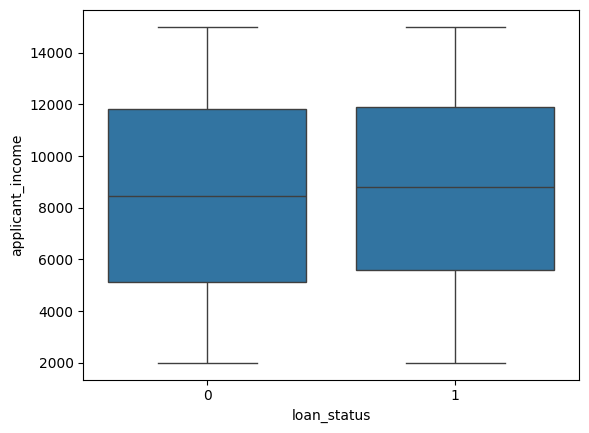

In [10]:
sns.boxplot(x='loan_status', y='applicant_income', data=df)
plt.show()

In [11]:
df.describe()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
count,20000.000000,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.500050,0.502900,1.500100,0.4965,0.490950,8536.235200,2497.318450,275.439150,311.448000,0.495500,1.002950,0.267100
std,0.500012,0.500004,1.119715,0.5000,0.499931,3772.987262,1441.015362,130.712641,103.502072,0.499992,0.819375,0.442456
min,0.000000,0.000000,0.000000,0.0000,0.000000,2000.000000,0.000000,50.000000,180.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.0000,0.000000,5250.000000,1260.000000,162.000000,240.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.0000,0.000000,8559.000000,2494.000000,274.000000,300.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,3.000000,1.0000,1.000000,11823.000000,3737.250000,390.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.0000,1.000000,14999.000000,5000.000000,500.000000,480.000000,1.000000,2.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              20000 non-null  int64
 1   married             20000 non-null  int64
 2   dependents          20000 non-null  int64
 3   education           20000 non-null  int64
 4   self_employed       20000 non-null  int64
 5   applicant_income    20000 non-null  int64
 6   coapplicant_income  20000 non-null  int64
 7   loan_amount         20000 non-null  int64
 8   loan_amount_term    20000 non-null  int64
 9   credit_history      20000 non-null  int64
 10  property_area       20000 non-null  int64
 11  loan_status         20000 non-null  int64
dtypes: int64(12)
memory usage: 1.8 MB


In [13]:
from sklearn.model_selection import train_test_split
X = df.drop("loan_status", axis=1)
y = df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [15]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2964
           1       0.99      1.00      1.00      1036

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [16]:

# Cell 18: Markdown - Loan Approval Prediction System
"""
## Loan Approval Prediction System

Enter the details of a new loan application below to predict whether the loan will be approved or not.
"""

# Cell 19: Code - User Input Example
user_input = {
    'gender': 1,  # 1: Male, 0: Female
    'married': 1,  # 1: Yes, 0: No
    'dependents': 0,  # Number of dependents
    'education': 0,  # 0: Graduate, 1: Not Graduate
    'self_employed': 0,  # 1: Yes, 0: No
    'applicant_income': 5000,
    'coapplicant_income': 0,
    'loan_amount': 150,
    'loan_amount_term': 360,
    'credit_history': 1,  # 1: Good, 0: Bad
    'property_area': 2  # 0: Rural, 1: Semiurban, 2: Urban
}

# Cell 20: Code - Prediction
input_df = pd.DataFrame([user_input])
prediction = model.predict(input_df)[0]
result = 'Approved' if prediction == 1 else 'Rejected'
print(f"Loan Application Status: {result}")

# Cell 21: Markdown - Instructions
"""
### Instructions
- Edit the values in the `user_input` dictionary to match a new applicant's details.
- Run the prediction cell to see if the loan would be approved or rejected.
- The encoding for categorical variables is as follows:
    - gender: 1 = Male, 0 = Female
    - married: 1 = Yes, 0 = No
    - education: 0 = Graduate, 1 = Not Graduate
    - self_employed: 1 = Yes, 0 = No
    - credit_history: 1 = Good, 0 = Bad
    - property_area: 0 = Rural, 1 = Semiurban, 2 = Urban
"""


Loan Application Status: Approved


"\n### Instructions\n- Edit the values in the `user_input` dictionary to match a new applicant's details.\n- Run the prediction cell to see if the loan would be approved or rejected.\n- The encoding for categorical variables is as follows:\n    - gender: 1 = Male, 0 = Female\n    - married: 1 = Yes, 0 = No\n    - education: 0 = Graduate, 1 = Not Graduate\n    - self_employed: 1 = Yes, 0 = No\n    - credit_history: 1 = Good, 0 = Bad\n    - property_area: 0 = Rural, 1 = Semiurban, 2 = Urban\n"